In [1]:
# python3.9
# !pip install pyannote.audio

In [2]:
# 11Gb
# !git clone https://github.com/pyannote/AMI-diarization-setup/
# !cd AMI-diarization-setup/pyannote && sh download_ami.sh

In [3]:
import os
from typing import List

os.environ["PYANNOTE_DATABASE_CONFIG"] = "AMI-diarization-setup/pyannote/database.yml"


import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import soundfile
import torch
from pyannote.audio import Model
from pyannote.audio.models.segmentation import PyanNet
from pyannote.audio.pipelines import (
    VoiceActivityDetection as VoiceActivityDetectionPipeline,
)
from pyannote.audio.tasks import VoiceActivityDetection
from pyannote.database import FileFinder, get_protocol

'AMI-SDM.SpeakerDiarization.only_words' found in /Users/georgijgospodinov/git/speech_course/week10/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI-SDM.SpeakerDiarization.mini' found in /Users/georgijgospodinov/git/speech_course/week10/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.only_words' found in /Users/georgijgospodinov/git/speech_course/week10/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.mini' found in /Users/georgijgospodinov/git/speech_course/week10/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.word_and_vocalsounds' found in /User

INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []


**RTTM**: **R**ich **T**ranscription **T**ime **M**arked

\<type> \<file> \<chnl> \<tbeg> \<tdur> \<ortho> \<stype> \<name> \<conf> \<slat>
    


In [4]:
!head AMI-diarization-setup/word_and_vocalsounds/rttms/dev/ES2011a.rttm

SPEAKER ES2011a 1 34.27 10.12 <NA> <NA> FEE041 <NA> <NA>
SPEAKER ES2011a 1 46.43 10.42 <NA> <NA> FEE041 <NA> <NA>
SPEAKER ES2011a 1 58.56 5.72 <NA> <NA> FEE041 <NA> <NA>
SPEAKER ES2011a 1 65.0 12.78 <NA> <NA> FEE044 <NA> <NA>
SPEAKER ES2011a 1 77.04 3.75 <NA> <NA> FEE041 <NA> <NA>
SPEAKER ES2011a 1 78.93 3.96 <NA> <NA> FEE044 <NA> <NA>
SPEAKER ES2011a 1 82.98 6.26 <NA> <NA> FEE041 <NA> <NA>
SPEAKER ES2011a 1 84.791 0.781 <NA> <NA> FEE042 <NA> <NA>
SPEAKER ES2011a 1 85.808 0.857 <NA> <NA> FEE043 <NA> <NA>
SPEAKER ES2011a 1 89.02 4.08 <NA> <NA> FEE043 <NA> <NA>


In [5]:
!cat AMI-diarization-setup/pyannote/database.yml

Databases:
  # tell pyannote.database where to find AMI wav files.
  # {uri} is a placeholder for the session name (eg. ES2004c).
  # you might need to update this line to fit your own setup.
  AMI: amicorpus/{uri}/audio/{uri}.Mix-Headset.wav
  AMI-SDM: amicorpus/{uri}/audio/{uri}.Array1-01.wav

Protocols:

  AMI-SDM:
    SpeakerDiarization:
      only_words:
        train:
            uri: ../lists/train.meetings.txt
            annotation: ../only_words/rttms/train/{uri}.rttm
            annotated: ../uems/train/{uri}.uem
        development:
            uri: ../lists/dev.meetings.txt
            annotation: ../only_words/rttms/dev/{uri}.rttm
            annotated: ../uems/dev/{uri}.uem
        test:
            uri: ../lists/test.meetings.txt
            annotation: ../only_words/rttms/test/{uri}.rttm
            annotated: ../uems/test/{uri}.uem
      mini:
        train:
          uri: ../lists/train.mini.txt
          annotation: ../only_words/rttms/train/{uri}.rttm
          ann

In [6]:
ami = get_protocol(
    "AMI.SpeakerDiarization.only_words", preprocessors={"audio": FileFinder()}
)

# Voice Activity Detection

In [7]:
vad_task = VoiceActivityDetection(ami, duration=2.0, batch_size=128)
vad_model = PyanNet(
    task=vad_task,
    sincnet={"stride": 100},
    lstm={"hidden_size": 32, "num_layers": 2, "bidirectional": True},
    linear={"hidden_size": 32, "num_layers": 2},
)

Protocol AMI.SpeakerDiarization.only_words does not precompute the output of torchaudio.info(): adding a 'torchaudio.info' preprocessor for you to speed up dataloaders. See pyannote.database documentation on how to do that yourself.


/opt/homebrew/Caskroom/miniforge/base/envs/pyannote/lib/python3.9/site-packages/pyannote/database/util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/opt/homebrew/Caskroom/miniforge/base/envs/pyannote/lib/python3.9/site-packages/pyannote/database/util.py:284: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_uem, names=names, dtype=dtype, delim_whitespace=True)
/opt/homebrew/Caskroom/miniforge/base/envs/pyannote/lib/python3.9/site-packages/pyannote/database/util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/opt/homebrew/Caskroom/miniforge/base/envs/pyannote/lib/python3.9/site-packages/pyannote/database/util.py:284: Future

In [8]:
vad_model

PyanNet(
  (sincnet): SincNet(
    (wav_norm1d): InstanceNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (conv1d): ModuleList(
      (0): Encoder(
        (filterbank): ParamSincFB()
      )
      (1): Conv1d(80, 60, kernel_size=(5,), stride=(1,))
      (2): Conv1d(60, 60, kernel_size=(5,), stride=(1,))
    )
    (pool1d): ModuleList(
      (0-2): 3 x MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (norm1d): ModuleList(
      (0): InstanceNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (1-2): 2 x InstanceNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    )
  )
  (lstm): LSTM(60, 32, num_layers=2, batch_first=True, bidirectional=True)
  (linear): ModuleList(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
  )
)

In [9]:
# import pytorch_lightning as pl


# trainer = pl.Trainer(accelerator="cpu", max_epochs=2)
# trainer.fit(vad_model)

In [10]:
vad_model = Model.from_pretrained("data/vad_model.ckpt")

In [11]:
def create_stream(
    pyaudio_manager,
    sample_rate: int = 16_000,
    frames_per_buffer: int = 1600,
):
    return pyaudio_manager.open(
        format=pyaudio.paInt16,
        channels=1,
        rate=sample_rate,
        input=True,
        frames_per_buffer=frames_per_buffer,
    )


def record_audio_chunk(stream, duration_seconds: float = 0.1) -> np.ndarray:
    frames_to_read = int(stream._rate * duration_seconds)
    byte_frames: bytes = stream.read(frames_to_read, exception_on_overflow=False)
    audio_frame = np.frombuffer(byte_frames, dtype=np.int16)
    float_audio_frame = audio_frame / (1 << 15)
    return float_audio_frame

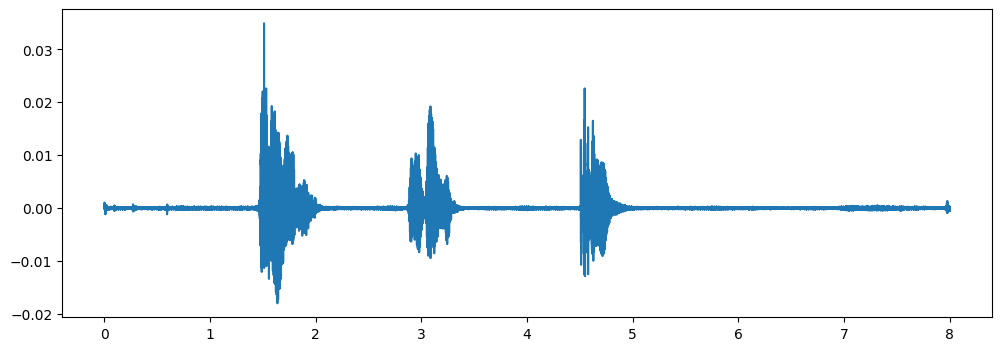

In [12]:
SR = 16_000


def record_audio(duration=8, chunk_duration=0.1):
    pa_manager = pyaudio.PyAudio()
    stream = create_stream(pa_manager, sample_rate=SR)

    frames = []

    while len(frames) < duration / chunk_duration:
        audio_frames = record_audio_chunk(stream, duration_seconds=chunk_duration)
        frames.append(audio_frames)

    return np.concatenate(frames)


wav = record_audio()

ipd.display(ipd.Audio(wav, rate=SR))
plt.figure(figsize=(12, 4))
plt.plot(np.arange(wav.size) / SR, wav)
plt.show()

In [13]:
WINDOW_SIZE = 2 * SR
STRIDE = 2 * SR // 10
RESOLUTION = STRIDE / SR


def window_infernece(model, wav, window_size=32000, window_shift=32000):

    assert STRIDE <= window_shift <= window_size

    model.eval()

    start = 0

    probs = []

    windows = window_size // window_shift

    vad_probs = (-1e-3) * np.ones(
        (
            wav.size // window_size * (window_size // window_shift) + 1,
            wav.size // STRIDE,
        )
    )
    prev_padding = 0
    i = 0

    while start <= wav.size - window_size:
        wav_tensor = (
            torch.from_numpy(wav[start : start + window_size])
            .to(torch.float32)
            .reshape(1, 1, -1)
        )

        with torch.no_grad():
            out = vad_model(wav_tensor)

        out_probs = out.squeeze(0, 2).numpy()

        padded_out_probs = np.pad(
            out_probs,
            pad_width=(
                prev_padding,
                vad_probs.shape[1] - prev_padding - out_probs.size,
            ),
            constant_values=(-1,),
        )

        vad_probs[i, :] = padded_out_probs

        prev_padding += window_shift // STRIDE
        start += window_shift
        i += 1

    return np.array(
        [
            np.median(vad_probs[:, j][vad_probs[:, j] > -1e-3])
            for j in range(vad_probs.shape[1])
        ]
    )


min_duration = 0
max_duration = 8
min_frames = int(min_duration * SR)
max_frames = int(max_duration * SR)

threshold = 0.3

In [14]:
smoothed_vad_probs = window_infernece(
    vad_model, wav, window_size=32_000, window_shift=3_200
)

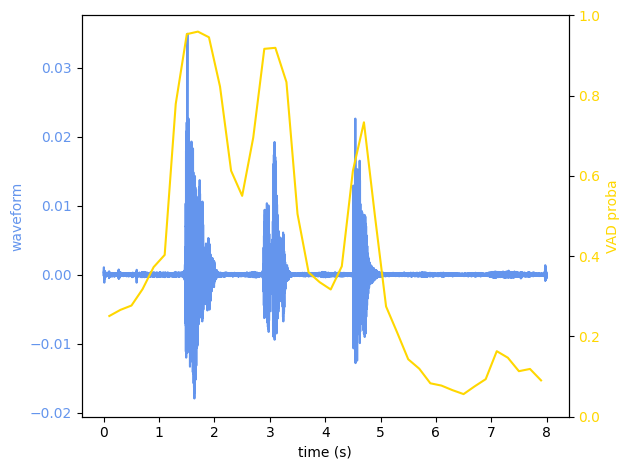

In [15]:
ipd.display(ipd.Audio(wav[min_frames:max_frames], rate=SR))

fig, ax1 = plt.subplots()

color = "cornflowerblue"
ax1.set_xlabel("time (s)")
ax1.set_ylabel("waveform", color=color)
ax1.plot(
    np.arange(min_frames, max_frames) / SR, wav[min_frames:max_frames], color=color
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()

color = "gold"
ax2.set_ylabel("VAD proba", color=color)
ax2.plot(
    [(i + 0.5) * RESOLUTION for i in range(smoothed_vad_probs.size)],
    smoothed_vad_probs,
    color=color,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylim(0, 1)
fig.tight_layout()
plt.savefig("VAD_result.png", dpi=300)

In [16]:
wav, _ = soundfile.read("./data/speech_with_music.wav")

speech_segments = [
    (1, 1.8),
    (2.2, 2.7),
    (3.4, 3.8),
    (4.5, 5.1),
    (5.5, 6),
]

smoothed_vad_probs = window_infernece(
    vad_model, wav, window_size=32_000, window_shift=3_200
)

In [17]:
def find_segments(predictions: List[bool]) -> List[List[int]]:
    prev = False
    pred_segments = []
    for i, point in enumerate(predictions):
        if point:
            if prev:
                pred_segments[-1][1] = i
            else:
                pred_segments.append([i, i])
                prev = True
        else:
            prev = False

    return pred_segments


predicted_segments = find_segments(smoothed_vad_probs > threshold)

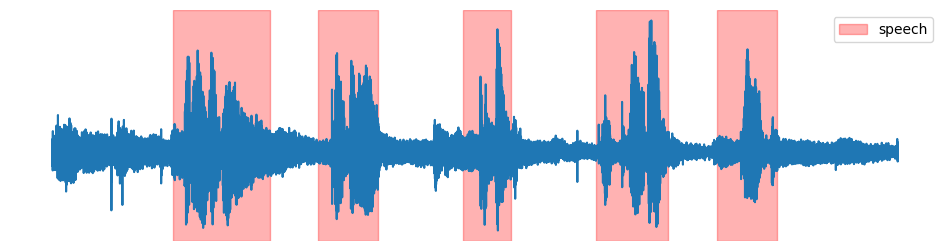

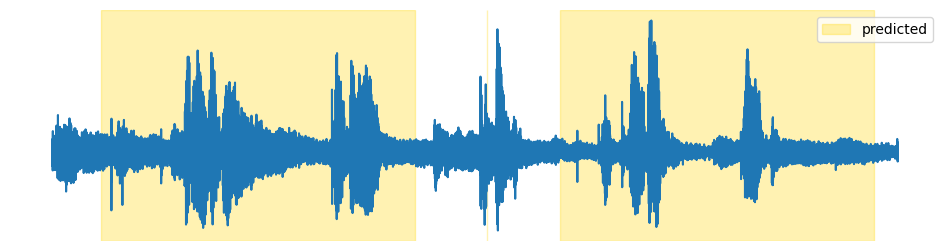

In [18]:
plt.figure(figsize=(12, 3))

for i, (start_time, end_time) in enumerate(speech_segments):
    label = "speech" if i == 0 else None
    plt.axvspan(start_time, end_time, color="red", alpha=0.3, label=label)

plt.plot(np.arange(wav.size) / SR, wav)
plt.legend()
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 3))

for i, (start_frame, end_frame) in enumerate(predicted_segments):
    label = "predicted" if i == 0 else None
    plt.axvspan(
        start_frame * RESOLUTION,
        end_frame * RESOLUTION,
        color="gold",
        alpha=0.3,
        label=label,
    )
plt.plot(np.arange(wav.size) / SR, wav)
plt.legend()
plt.axis("off")
plt.savefig("VAD_prediction.png", dpi=300)

In [19]:
soundfile.write("data/whisper_with_music.wav", data=wav, samplerate=SR)

In [20]:
hyper_params = {
    "onset": 0.6,
    "offset": 0.4,
    "min_duration_on": 0.0,
    "min_duration_off": 0.0,
}

pipeline = VoiceActivityDetectionPipeline(segmentation=vad_model)

pipeline.instantiate(hyper_params)

In [21]:
res = pipeline("./data/whisper_with_music.wav")

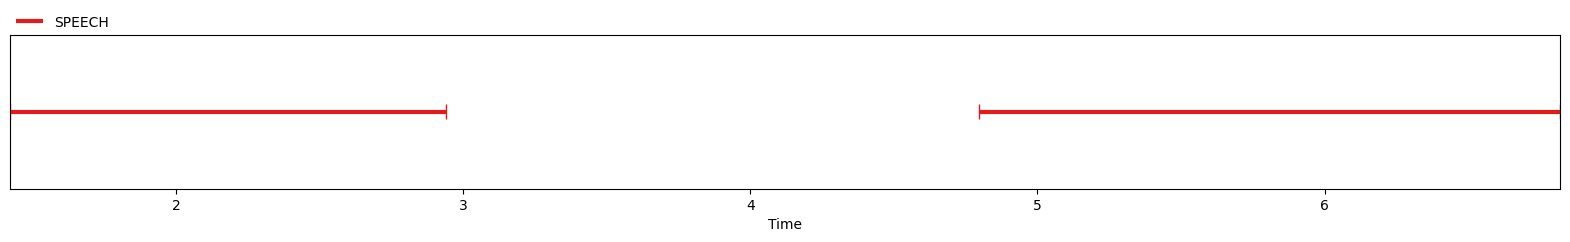

In [22]:
res

# Speaker Segmentation

In [23]:
# from pyannote.audio.tasks import SpeakerDiarization

# seg_task = SpeakerDiarization(ami, duration=4.0, max_num_speakers=4, batch_size=64)

# sd_model = PyanNet(
#     task=seg_task, sincnet={"stride": 105},
#     lstm={"hidden_size": 32, "num_layers": 2, "bidirectional": True},
#     linear={"hidden_size": 32, "num_layers": 2},
# )

# trainer = pl.Trainer(accelerator="cpu", max_epochs=5)
# trainer.fit(sd_model)

In [24]:
sd_model = Model.from_pretrained("data/sd_model.ckpt")

In [25]:
wav = record_audio(duration=12)

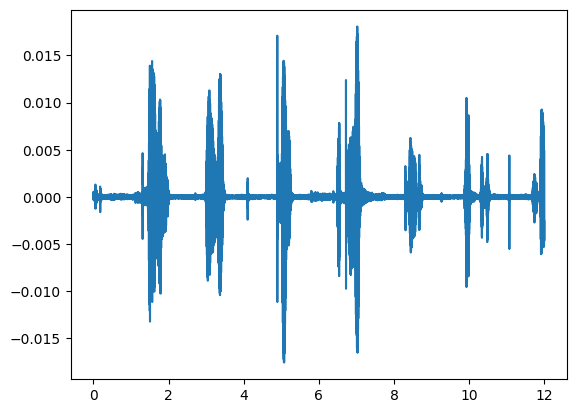

In [26]:
plt.plot(np.arange(wav.size) / SR, wav)

In [27]:
def diarization_window_infernece(model, wav, window_size=64_000, window_shift=64_000):

    assert STRIDE <= window_shift <= window_size

    model.eval()

    start = 0

    prev_padding = 0
    i = 0

    fig, ax1 = plt.subplots()
    color = "cornflowerblue"
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("waveform", color=color)
    ax1.plot(np.arange(wav.size) / SR, wav, color=color)
    ax1.tick_params(axis="y", labelcolor=color)
    ax2 = ax1.twinx()

    out_scores = []

    while start <= wav.size - window_size:
        wav_tensor = (
            torch.from_numpy(wav[start : start + window_size])
            .to(torch.float32)
            .reshape(1, 1, -1)
        )

        with torch.no_grad():
            out = model(wav_tensor)

        out_probs = out.squeeze(0).numpy()

        colors = ["gold", "green", "darkorange", "black"]
        for j in range(out_probs.shape[1]):
            ax2.plot(
                [
                    (i + 0.5) * RESOLUTION
                    for i in range(prev_padding, prev_padding + out_probs.shape[0])
                ],
                out_probs[:, j],
                color=colors[j],
            )

        fig.tight_layout()

        prev_padding += window_shift // STRIDE
        start += window_shift
        i += 1
        out_scores.append(out_probs)
    ax2.set_ylabel("Speaker Activity proba")
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis="y")
    plt.show()
    return out_scores

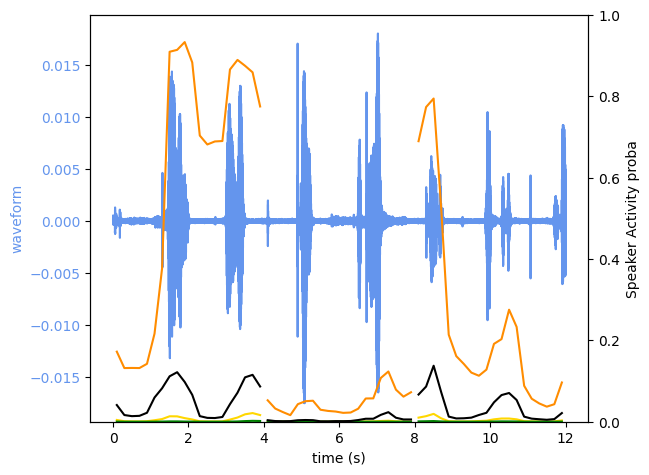

In [28]:
res = diarization_window_infernece(sd_model, wav)